In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats import kruskal
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

db_url = f'postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}'

engine = create_engine(db_url)

le_df = pd.read_sql_query(f'SELECT * FROM {table_name};', con=engine)

# close the db connetion
engine.dispose()

In [3]:
le_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
le_df.shape

(2938, 22)

In [29]:
# Check for missing values
(le_df.isnull().sum()/le_df.isnull().count()).sort_values(ascending=False)

Population                         0.221920
Hepatitis B                        0.188223
GDP                                0.152485
Total expenditure                  0.076923
Alcohol                            0.066031
Income composition of resources    0.056841
Schooling                          0.055480
 BMI                               0.011572
 thinness  1-19 years              0.011572
 thinness 5-9 years                0.011572
Diphtheria                         0.006467
Polio                              0.006467
Adult Mortality                    0.003404
Life expectancy                    0.003404
under-five deaths                  0.000000
 HIV/AIDS                          0.000000
Measles                            0.000000
percentage expenditure             0.000000
infant deaths                      0.000000
Status                             0.000000
Year                               0.000000
Country                            0.000000
dtype: float64

In [12]:
# fix space at the end of Life expectancy column name
le_df.rename(columns={'Life expectancy ':'Life expectancy'}, inplace='True')

In [32]:
columns_missing_values = (le_df.isnull().sum()/le_df.isnull().count()).sort_values(ascending=False).index[0:14]
columns_missing_values

Index(['Population', 'Hepatitis B', 'GDP', 'Total expenditure', 'Alcohol',
       'Income composition of resources', 'Schooling', ' BMI ',
       ' thinness  1-19 years', ' thinness 5-9 years', 'Diphtheria ', 'Polio',
       'Adult Mortality', 'Life expectancy'],
      dtype='object')

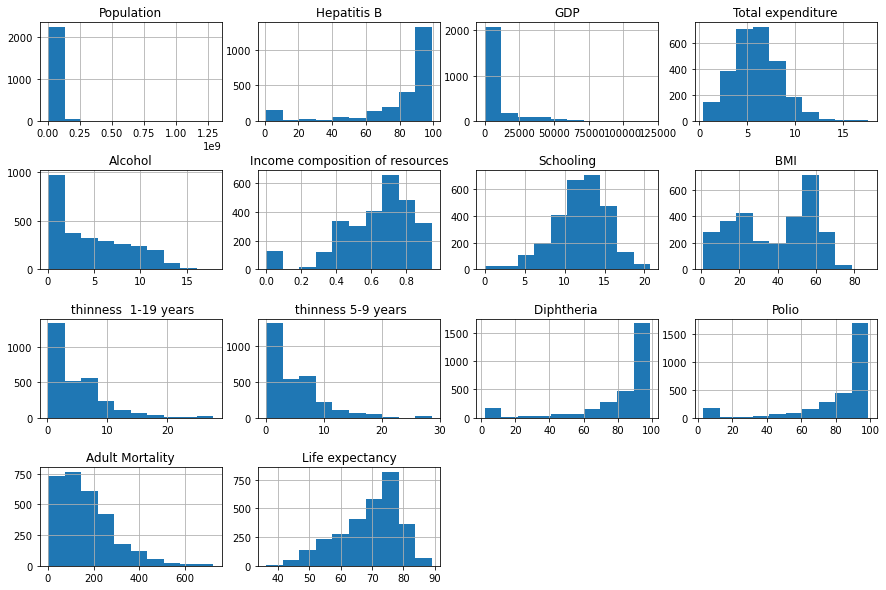

In [38]:
plt.figure(figsize=[15,10])
plot_number = 1
for column in columns_missing_values:
    plt.subplot(4,4, plot_number)
    le_df[column].hist()
    plt.title(column)
    plot_number += 1

plt.subplots_adjust(hspace=0.5)
    

In [39]:
le_df2 = le_df.copy()

In [40]:
for column in columns_missing_values:
    le_df2[column].fillna(le_df2[column].median(),inplace=True)

In [42]:
(le_df2.isnull().sum()/le_df2.isnull().count())

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

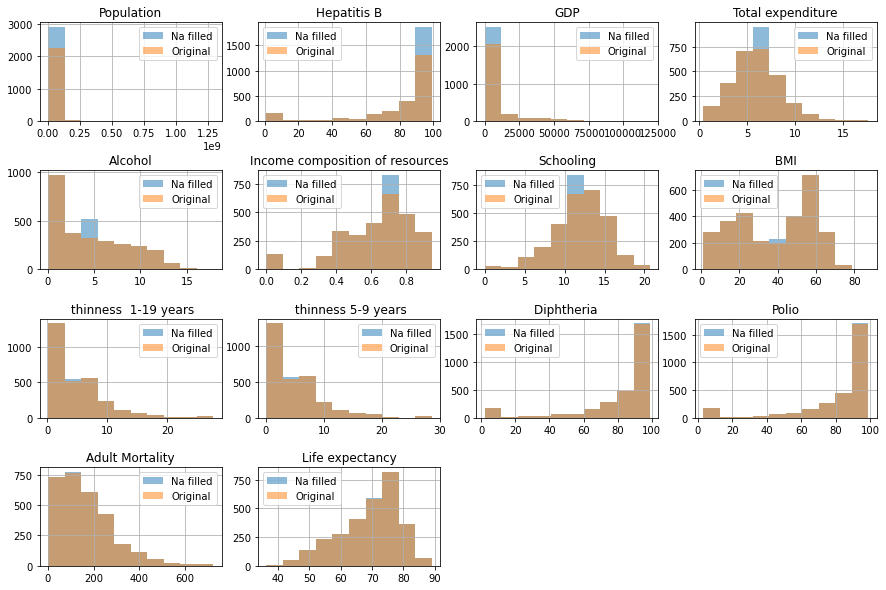

In [46]:
plt.figure(figsize=[15,10])
plot_number = 1
for column in columns_missing_values:
    plt.subplot(4,4, plot_number)
    le_df2[column].hist(alpha=0.5)
    le_df[column].hist(alpha=0.5)
    plt.legend(['Na filled', 'Original'])
    plt.title(column)
    plot_number += 1

plt.subplots_adjust(hspace=0.5)

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

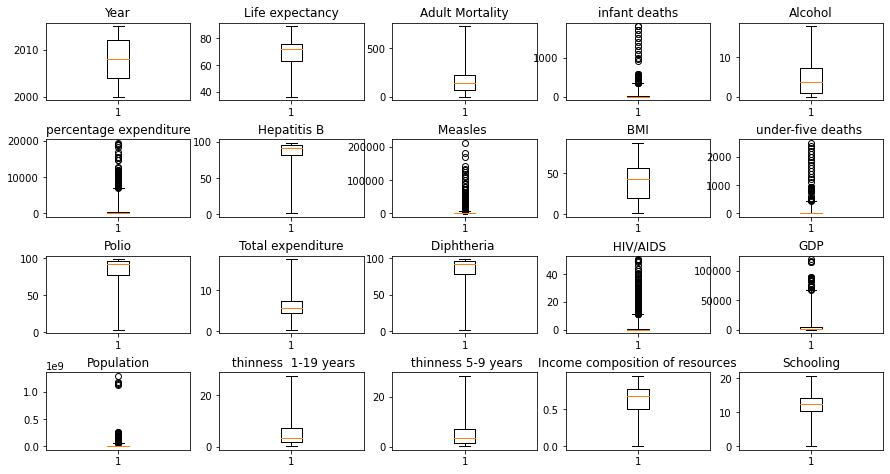

In [73]:
# check for outliers
plt.figure(figsize=[15,10])
plot_number = 1
for column in le_df2.select_dtypes(include='number').columns:
    plt.subplot(5,5, plot_number)
    plt.boxplot(le_df2[column], whis=15)
    plt.title(column)
    plot_number += 1

plt.subplots_adjust(hspace=0.5)

<AxesSubplot:>

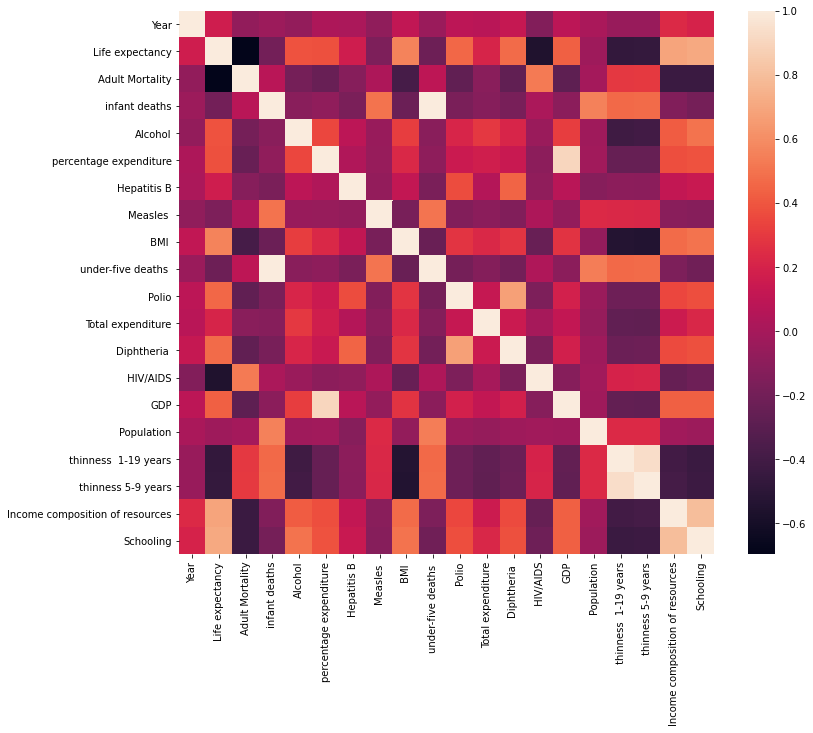

In [70]:
plt.figure(figsize=[12,10])
sns.heatmap(le_df2.corr())

In [90]:
le_df2.corr()['Life expectancy'].sort_values(ascending=False)


Life expectancy                    1.000000
Schooling                          0.713054
Income composition of resources    0.688662
BMI                                0.556901
Diphtheria                         0.472211
Polio                              0.458399
GDP                                0.430461
Alcohol                            0.388918
percentage expenditure             0.381418
Total expenditure                  0.208844
Year                               0.170819
Hepatitis B                        0.170219
Population                        -0.029014
Measles                           -0.157767
infant deaths                     -0.196769
under-five deaths                 -0.222738
 thinness 5-9 years               -0.462473
 thinness  1-19 years             -0.468002
HIV/AIDS                          -0.556703
Adult Mortality                   -0.696390
Name: Life expectancy, dtype: float64

In [142]:
test_vars = ['Schooling', 
             'Income composition of resources', 
             'BMI', 
             'HIV/AIDS', 
             'Adult Mortality', 
             'Total expenditure', 
             'Alcohol']
le_df2.rename(columns={' BMI ':'BMI', ' HIV/AIDS': 'HIV/AIDS'}, inplace=True)
le_df2['Alcohol']

0       0.01
1       0.01
2       0.01
3       0.01
4       0.01
        ... 
2933    4.36
2934    4.06
2935    4.43
2936    1.72
2937    1.68
Name: Alcohol, Length: 2938, dtype: float64

In [143]:
kruskal(le_df2['Schooling'], 
        le_df2['Income composition of resources'], 
        le_df2['BMI'], 
        le_df2['HIV/AIDS'], 
        le_df2['Adult Mortality'],
        le_df2['Total expenditure'],
        le_df2['Alcohol'])

KruskalResult(statistic=16489.03775846206, pvalue=0.0)

In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
Y = le_df2['Life expectancy']
scaler = StandardScaler()
test_df = le_df2[test_vars]
X = le_df2[test_vars]
X = scaler.fit_transform(X)

kbest = SelectKBest(k=3)
X_kbest = kbest.fit_transform(X,Y)
test_df.loc[:,kbest.get_support()].columns

Index(['Schooling', 'HIV/AIDS', 'Adult Mortality'], dtype='object')

In [149]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.43931589, 0.18015062, 0.12409046, 0.0900481 , 0.07694227,
       0.06132418, 0.02812848])